In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [4]:
# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [16]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [17]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [18]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Significance of global_varibales_initializer()?

In [19]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050, cost=0.165251702, W=0.4157370328903198, b=-0.3937579393386841
Epoch: 0100, cost=0.155051425, W=0.4058557450771332, b=-0.3226720988750458
Epoch: 0150, cost=0.146029264, W=0.3965621292591095, b=-0.2558146119117737
Epoch: 0200, cost=0.138049170, W=0.387821227312088, b=-0.19293338060379028
Epoch: 0250, cost=0.130990729, W=0.3796001076698303, b=-0.13379165530204773
Epoch: 0300, cost=0.124747612, W=0.3718681037425995, b=-0.07816751301288605
Epoch: 0350, cost=0.119225688, W=0.36459586024284363, b=-0.025851527228951454
Epoch: 0400, cost=0.114341661, W=0.3577560782432556, b=0.023352988064289093
Epoch: 0450, cost=0.110021882, W=0.3513232171535492, b=0.06963111460208893
Epoch: 0500, cost=0.106201179, W=0.34527283906936646, b=0.11315697431564331
Epoch: 0550, cost=0.102821976, W=0.33958232402801514, b=0.1540938764810562
Epoch: 0600, cost=0.099833198, W=0.3342302143573761, b=0.19259637594223022
Epoch: 0650, cost=0.097189851, W=0.3291965425014496, b=0.22880873084068298
Epoch: 0700, cost=

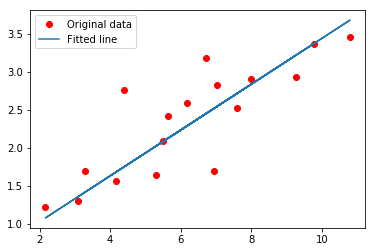

In [20]:
# Start training
with tf.Session() as sess:
    sess.run(init)
    
    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print("Epoch: {:04d}, cost={:.9f}, W={}, b={}".format \
            (epoch+1, c, sess.run(W), sess.run(b)))
        
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n' )
    
    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()